In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Get the training data

x=pd.read_csv('C:/Users/ACER/OneDrive/Python/data logistic regressioin/Training Data/Logistic_X_Train.csv')
y=pd.read_csv('C:/Users/ACER/OneDrive/Python/data logistic regressioin/Training Data/Logistic_Y_Train.csv')

# x=x.values.reshape((-1,))
print(x.shape)
# y=y.values.reshape((-1,))
print(y.shape)
print(x.head())

(3000, 3)
(3000, 1)
         f1        f2        f3
0 -1.239375  0.749101 -0.528515
1 -1.036070  0.801436 -1.283712
2 -0.615579  1.579521 -1.391927
3  1.335978  1.348651  1.433564
4  0.658925  1.300019  0.571603


In [7]:
f1= x[['f1']].values
f2= x[['f2']].values
f3= x[['f3']].values

C:\Users\ACER\AppData\Local\Temp\ipykernel_10560\1728075322.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(f2, f1, f3,  cmap='hsv')


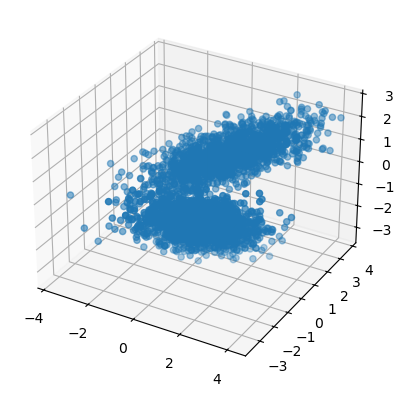

In [8]:
fig= plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2, f1, f3,  cmap='hsv')

In [9]:
x = f1
x = np.hstack((f1,f2))
x = np.hstack((x, f3))

y = y[['label']].values
y = y.reshape((-1))

In [10]:
print(x.shape)
print(y.shape)

(3000, 3)
(3000,)


In [11]:

def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [12]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-1.0*x))

In [13]:
def error(x,y,w,b):
    err=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=(y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx))
    return err/m

In [14]:
def gradient(x,y,w,b):
    grad_b=0.0
    grad_w=np.zeros(w.shape)
    m=x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_b+=(y[i]-hx)
        grad_w+=((y[i]-hx)*x[i])
    grad_b/=m
    grad_w/=m
    return [grad_w,grad_b]

In [15]:
def gradient_descent(x,y,w,b,learning_rate=0.01):
    err=error(x,y,w,b)
    [grad_w,grad_b]=gradient(x,y,w,b)
    w+=learning_rate*grad_w
    b+=learning_rate*grad_b
    return err,w,b

In [16]:
def predict(x,w,b):
    confidence=hyposthesis(x,w,b)
    if(confidence>0.5):
        return 1
    else:
        return 0

In [17]:
def get_acc(x_test,y_test,w,b):
    pred=[]
    m=y_test.shape[0]
    for i in range(m):
        p=predict(x_test[i],w,b)
        pred.append(p)
    pred=np.array(pred)

    return float(((pred==y_test).sum())/m)

In [ ]:
loss=[]
acc=[]

w=np.zeros((x.shape[1],))
b=0


In [ ]:
for i in range(10000):
    l,w,b=gradient_descent(x,y,w,b,learning_rate=0.1)
    loss.append(l)

In [ ]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

In [ ]:
x_test= pd.read_csv("C:/Users/ACER/OneDrive/Python/data logistic regressioin/Logistic_X_Test.csv")